<a href="https://colab.research.google.com/github/Sajad-Adil/Air-quality-system/blob/main/Pandas_Task_Sajjad_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Libraries

In [1]:
import os
import pandas as pd
import sys
import seaborn as sns
import matplotlib.pyplot as plt

##Data Loading

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("atillacolak/top-50-spotify-tracks-2020")

print("Path to dataset files:", path)

In [3]:
df = pd.read_csv('/root/.cache/kagglehub/datasets/atillacolak/top-50-spotify-tracks-2020/versions/2/spotifytoptracks.csv' , sep=",", index_col=0)

In [4]:
df.head()

,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,200040,R&B/Soul
1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,209755,Alternative/Indie
2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.642,116.971,196653,Hip-Hop/Rap
3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.894,121.962,176219,Dance/Electronic
4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.679,123.950,183290,Nu-disco


## Data Cleaning

1.1 Check for missing values and delete them if there is any

In [ ]:
print(df.isnull().sum())

#The dataset does not contain any missing values

artist              0
album               0
track_name          0
track_id            0
energy              0
danceability        0
key                 0
loudness            0
acousticness        0
speechiness         0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
genre               0
dtype: int64


1.2 Removing duplicate samples and features

In [ ]:
# Check for duplicate rows
duplicate_rows = df.duplicated()

# Count the number of duplicate rows
num_duplicate_rows = duplicate_rows.sum()
print(f"Number of duplicate rows: {num_duplicate_rows}")

Number of duplicate rows: 0


In [ ]:

duplicate_columns = df.T.duplicated()

num_duplicate_columns = duplicate_columns.sum()
print(f"Number of duplicate columns: {num_duplicate_columns}")

Number of duplicate columns: 0


1.3 Treating the outliers

In [14]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

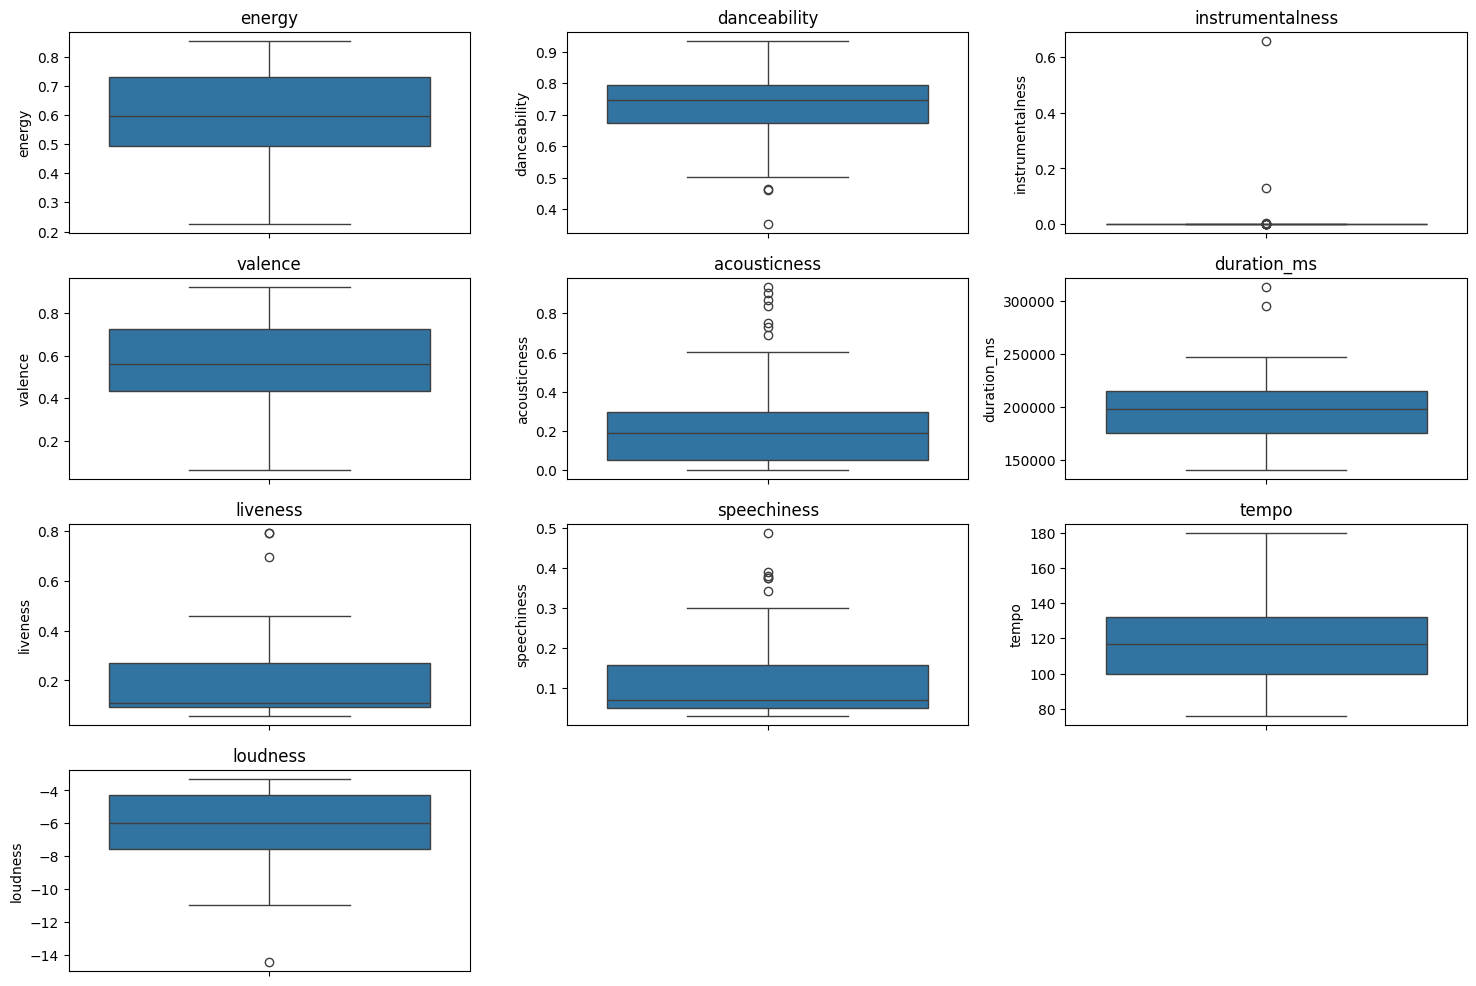

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize numerical columns for outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1  # Interquartile Range

# outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_mask = (df[numerical_columns] < lower_bound) | (df[numerical_columns] > upper_bound)

outliers = df[outlier_mask.any(axis=1)]
print(f"\nNumber of rows with outliers: {len(outliers)}")


# *NOTE* Since it is a really small dataset, I will not remove the rows that contain outliers


Number of rows with outliers: 25


#EDA


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 0 to 49
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            50 non-null     object 
 1   album             50 non-null     object 
 2   track_name        50 non-null     object 
 3   track_id          50 non-null     object 
 4   energy            50 non-null     float64
 5   danceability      50 non-null     float64
 6   key               50 non-null     int64  
 7   loudness          50 non-null     float64
 8   acousticness      50 non-null     float64
 9   speechiness       50 non-null     float64
 10  instrumentalness  50 non-null     float64
 11  liveness          50 non-null     float64
 12  valence           50 non-null     float64
 13  tempo             50 non-null     float64
 14  duration_ms       50 non-null     float64
 15  genre             50 non-null     object 
dtypes: float64(10), int64(1), object(5)
memory usage: 6

2.1 How many observations are there in this dataset?

In [ ]:
num_observations = df.shape[0]
print(f"Number of observations: {num_observations}")

Number of observations: 50


2.2 How many features this dataset has?

In [ ]:
num_features = df.shape[1]
print(f"Number of features: {num_features}")

Number of features: 16


2.3 Which of the features are categorical?

In [ ]:
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical features: {categorical_features}")

Categorical features: ['artist', 'album', 'track_name', 'track_id', 'genre']


2.4 Which of the features are numeric?

In [ ]:
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print(f"Numeric features: {numeric_features}")

Numeric features: ['energy', 'danceability', 'key', 'loudness', 'acousticness', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']


2.5 Are there any artists that have more than 1 popular track? If yes, which and how many?

In [ ]:
artist_counts = df['artist'].value_counts()
artists_with_multiple_tracks = artist_counts[artist_counts > 1]
print(f"Artists with more than 1 popular track:\n{artists_with_multiple_tracks}")

Artists with more than 1 popular track:
artist
Billie Eilish    3
Dua Lipa         3
Travis Scott     3
Justin Bieber    2
Harry Styles     2
Lewis Capaldi    2
Post Malone      2
Name: count, dtype: int64


2.6 Who was the most popular artist?

In [ ]:
most_popular_artist = artist_counts.idxmax()
print(f"Most popular artist: {most_popular_artist}")

Most popular artist: Billie Eilish


2.7 How many artists in total have their songs in the top 50?

In [ ]:
total_artists = df['artist'].nunique()
print(f"Total number of artists in the top 50:\n {total_artists} Artists")

Total number of artists in the top 50:
 40 Artists


2.8 Are there any albums that have more than 1 popular track? If yes, which and how many?

In [ ]:
album_counts = df['album'].value_counts()
albums_with_multiple_tracks = album_counts[album_counts > 1]
print(f"Albums with more than 1 popular track:\n{albums_with_multiple_tracks}")

Albums with more than 1 popular track:
album
Future Nostalgia        3
Hollywood's Bleeding    2
Fine Line               2
Changes                 2
Name: count, dtype: int64


2.9 How many albums in total have their songs in the top 50?

In [ ]:
total_albums = df['album'].nunique()
print(f"Total albums in the top 50: {total_albums}")

Total albums in the top 50: 45


2.10 Which tracks have a danceability score above 0.7?

In [ ]:
high_danceability_tracks = df[df['danceability'] > 0.7][['track_name', 'danceability']]
print("Tracks with danceability above 0.7:")
print(high_danceability_tracks)

Tracks with danceability above 0.7:
                                       track_name  danceability
1                                    Dance Monkey         0.825
2                                         The Box         0.896
3                           Roses - Imanbek Remix         0.785
4                                 Don't Start Now         0.793
5                    ROCKSTAR (feat. Roddy Ricch)         0.746
7                death bed (coffee for your head)         0.726
8                                         Falling         0.784
10                                           Tusa         0.803
13                                Blueberry Faygo         0.774
14                       Intentions (feat. Quavo)         0.806
15                                   Toosie Slide         0.830
17                                         Say So         0.787
18                                       Memories         0.764
19                     Life Is Good (feat. Drake)         0.795
20  

2.11 Which tracks have a danceability score below 0.4?

In [ ]:
low_danceability_tracks = df[df['danceability'] < 0.4][['track_name', 'danceability']]
print("Tracks with danceability below 0.4:")
print(low_danceability_tracks)

Tracks with danceability below 0.4:
              track_name  danceability
44  lovely (with Khalid)         0.351


2.12 Which tracks have their loudness above -5?

In [ ]:
high_loudness_tracks = df[df['loudness'] > -5][['track_name', 'loudness']]
print("Tracks with loudness above -5:")
print(high_loudness_tracks)

Tracks with loudness above -5:
                                       track_name  loudness
4                                 Don't Start Now    -4.521
6                                Watermelon Sugar    -4.209
10                                           Tusa    -3.280
12                                        Circles    -3.497
16                                  Before You Go    -4.858
17                                         Say So    -4.577
21                                      Adore You    -3.675
23                         Mood (feat. iann dior)    -3.558
31                                 Break My Heart    -3.434
32                                       Dynamite    -4.410
33               Supalonely (feat. Gus Dapperton)    -4.746
35                Rain On Me (with Ariana Grande)    -3.764
37  Sunflower - Spider-Man: Into the Spider-Verse    -4.368
38                                          Hawái    -3.454
39                                        Ride It    -4.258
40       

2.13 Which tracks have their loudness below -8?

In [ ]:
low_loudness_tracks = df[df['loudness'] < -8][['track_name', 'loudness']]
print("Tracks with loudness below -8:")
print(low_loudness_tracks)

Tracks with loudness below -8:
                                        track_name  loudness
7                 death bed (coffee for your head)    -8.765
8                                          Falling    -8.756
15                                    Toosie Slide    -8.820
20                Savage Love (Laxed - Siren Beat)    -8.520
24                             everything i wanted   -14.454
26                                         bad guy   -10.965
36                             HIGHEST IN THE ROOM    -8.764
44                            lovely (with Khalid)   -10.109
47  If the World Was Ending - feat. Julia Michaels   -10.086


2.14 Which track is the longest?

In [5]:
longest_track = df.loc[df['duration_ms'].idxmax(), ['track_name', 'duration_ms']]
print("Longest track:")
print(longest_track)

Longest track:
track_name     SICKO MODE
duration_ms        312820
Name: 49, dtype: object


In [8]:
longest_track_in_m = longest_track['duration_ms'] / 60000
print(f"Longest track in minutes: {longest_track_in_m}")

Longest track in minutes: 5.213666666666667


2.15 Which track is the shortest?

In [9]:
shortest_track = df.loc[df['duration_ms'].idxmin(), ['track_name', 'duration_ms']]
print("Shortest track:")
print(shortest_track)

Shortest track:
track_name     Mood (feat. iann dior)
duration_ms                    140526
Name: 23, dtype: object


In [10]:
shortest_track_in_m = shortest_track['duration_ms'] / 60000
print(f"Longest track in minutes: {shortest_track_in_m}")

Longest track in minutes: 2.3421


2.16 Which genre is the most popular?

In [11]:
most_popular_genre = df['genre'].value_counts().idxmax()
print(f"Most popular genre: {most_popular_genre}")

Most popular genre: Pop


2.17 Which genres have just one song on the top 50?

In [12]:
genres_with_one_song = df['genre'].value_counts()[df['genre'].value_counts() == 1].index.to_frame(index = False)
print("Genres with just one song:")
genres_with_one_song

Genres with just one song:


,genre
0,Nu-disco
1,R&B/Hip-Hop alternative
2,Pop/Soft Rock
3,Pop rap
4,Hip-Hop/Trap
5,Dance-pop/Disco
6,Disco-pop
7,Dreampop/Hip-Hop/R&B
8,Alternative/reggaeton/experimental
9,Chamber pop


2.18 How many genres in total are represented in the top 50?

In [ ]:
total_genres = df['genre'].nunique()
print(f"Total genres represented in the top 50: {total_genres}")

Total genres represented in the top 50: 16


2.19 Which features are strongly positively correlated?

In [15]:
correlation_matrix = df[numerical_columns].corr()
strong_positive_corr = correlation_matrix[correlation_matrix > 0.7].stack().reset_index()
strong_positive_corr = strong_positive_corr[strong_positive_corr[0] != 1]  # Exclude self-correlation
print("Strongly positively correlated features:")
print(strong_positive_corr)

Strongly positively correlated features:
    level_0   level_1        0
1    energy  loudness  0.79164
4  loudness    energy  0.79164


2.20 Which features are strongly negatively correlated?

In [17]:
strong_negative_corr = correlation_matrix[correlation_matrix < -0.6].stack().reset_index()
print("Strongly negatively correlated features:")
print(strong_negative_corr)

Strongly negatively correlated features:
        level_0       level_1         0
0        energy  acousticness -0.682479
1  acousticness        energy -0.682479


2.21 Which features are not correlated?


In [18]:
weak_corr = correlation_matrix[(correlation_matrix > -0.3) & (correlation_matrix < 0.3)].stack().reset_index()
weak_corr = weak_corr[weak_corr[0] != 1]  # Exclude self-correlation
print("Features with weak or no correlation:")
weak_corr

Features with weak or no correlation:


,level_0,level_1,0
0,energy,danceability,0.152552
1,energy,key,0.062428
2,energy,speechiness,0.074267
3,energy,liveness,0.069487
4,energy,tempo,0.075191
...,...,...,...
83,duration_ms,acousticness,-0.010988
84,duration_ms,instrumentalness,0.184709
85,duration_ms,liveness,-0.090188
86,duration_ms,valence,-0.039794


Correlation Matrix as Heatmap

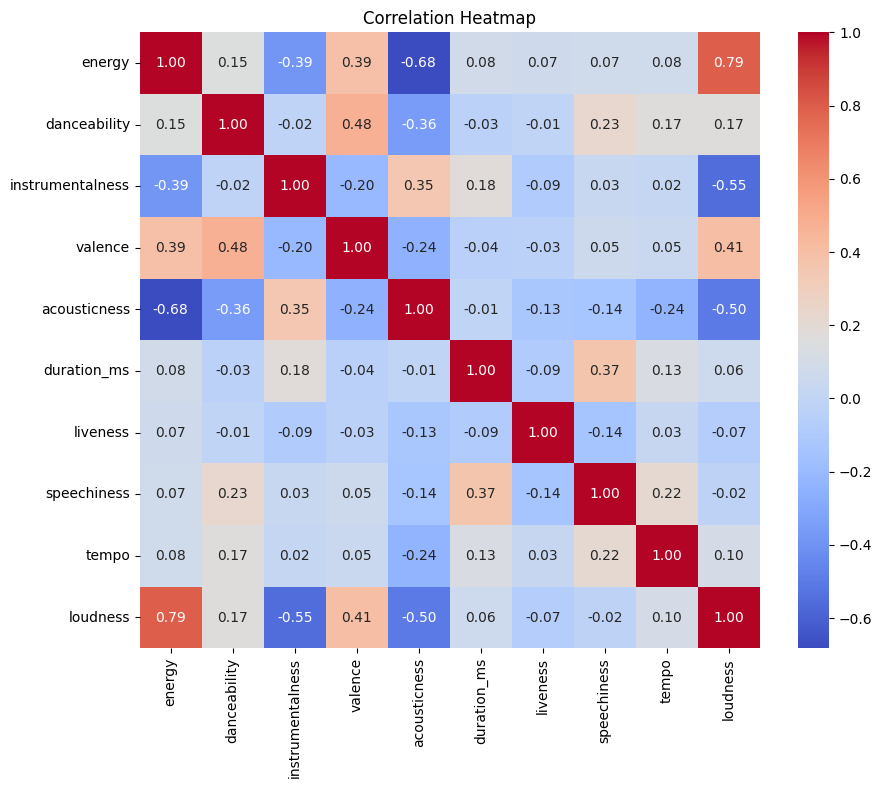

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

3. How does the danceability score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?

In [19]:
genres_of_interest = ['Pop', 'Hip-Hop/Rap', 'Dance/Electronic', 'Alternative/Indie']
filtered_df = df[df['genre'].isin(genres_of_interest)]
filtered_df.head()

,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.6880,0.0988,0.000161,0.170,0.540,98.078,209755,Alternative/Indie
2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.1040,0.0559,0.000000,0.790,0.642,116.971,196653,Hip-Hop/Rap
3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,0.721,0.785,8,-5.457,0.0149,0.0506,0.004320,0.285,0.894,121.962,176219,Dance/Electronic
5,DaBaby,BLAME IT ON BABY,ROCKSTAR (feat. Roddy Ricch),7ytR5pFWmSjzHJIeQkgog4,0.690,0.746,11,-7.956,0.2470,0.1640,0.000000,0.101,0.497,89.977,181733,Hip-Hop/Rap
6,Harry Styles,Fine Line,Watermelon Sugar,6UelLqGlWMcVH1E5c4H7lY,0.816,0.548,0,-4.209,0.1220,0.0465,0.000000,0.335,0.557,95.390,174000,Pop


               genre  danceability
0  Alternative/Indie      0.661750
1   Dance/Electronic      0.755000
2        Hip-Hop/Rap      0.765538
3                Pop      0.677571


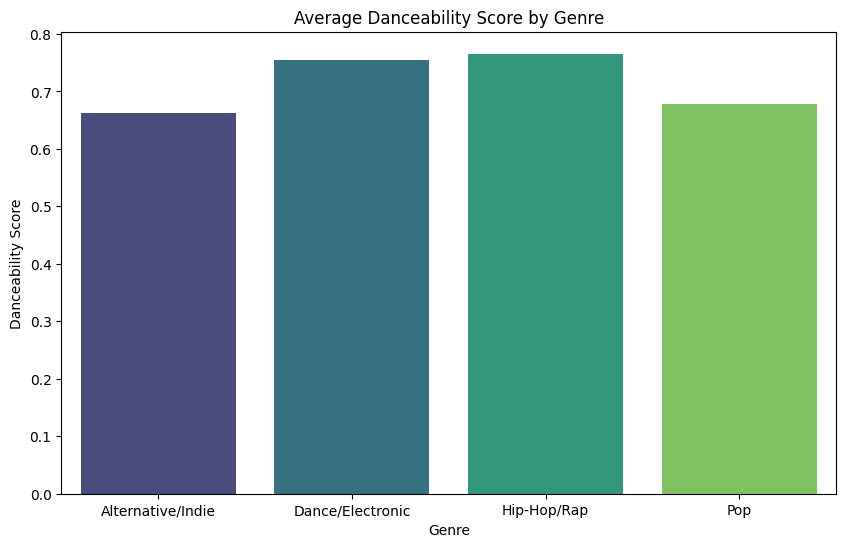

In [28]:
danceability_by_genre = filtered_df.groupby('genre')['danceability'].mean().reset_index()
print(danceability_by_genre)

plt.figure(figsize=(10, 6))
sns.barplot(x='genre', y='danceability', data=danceability_by_genre, palette='viridis', hue='genre', legend = False)
plt.title('Average Danceability Score by Genre')
plt.xlabel('Genre')
plt.ylabel('Danceability Score')
plt.show()

4. How does the loudness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?



               genre  loudness
0  Alternative/Indie -5.421000
1   Dance/Electronic -5.338000
2        Hip-Hop/Rap -6.917846
3                Pop -6.460357


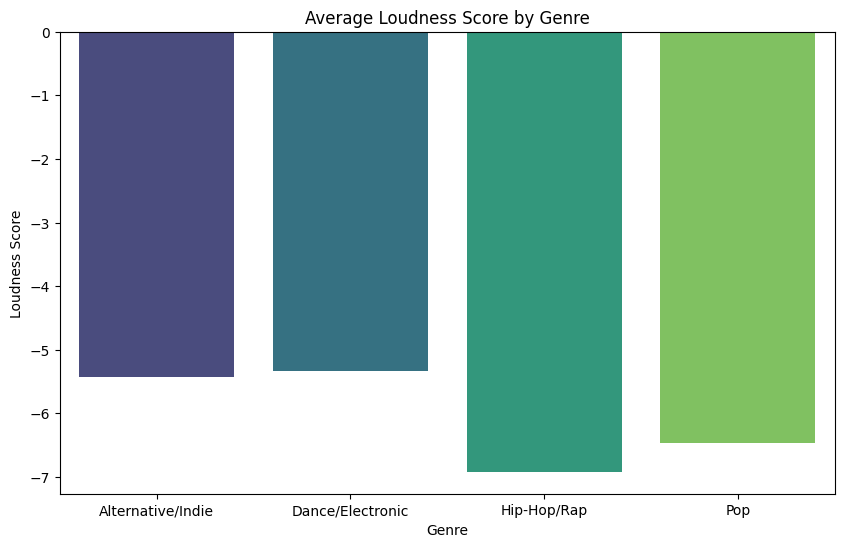

In [26]:
loudness_by_genre = filtered_df.groupby('genre')['loudness'].mean().reset_index()
print(loudness_by_genre)

plt.figure(figsize=(10, 6))
sns.barplot(x='genre', y='loudness', data=loudness_by_genre, palette='viridis', hue ='genre', legend=False)
plt.title('Average Loudness Score by Genre')
plt.xlabel('Genre')
plt.ylabel('Loudness Score')
plt.show()

5. How does the acousticness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?

               genre  acousticness
0  Alternative/Indie      0.583500
1   Dance/Electronic      0.099440
2        Hip-Hop/Rap      0.188741
3                Pop      0.323843


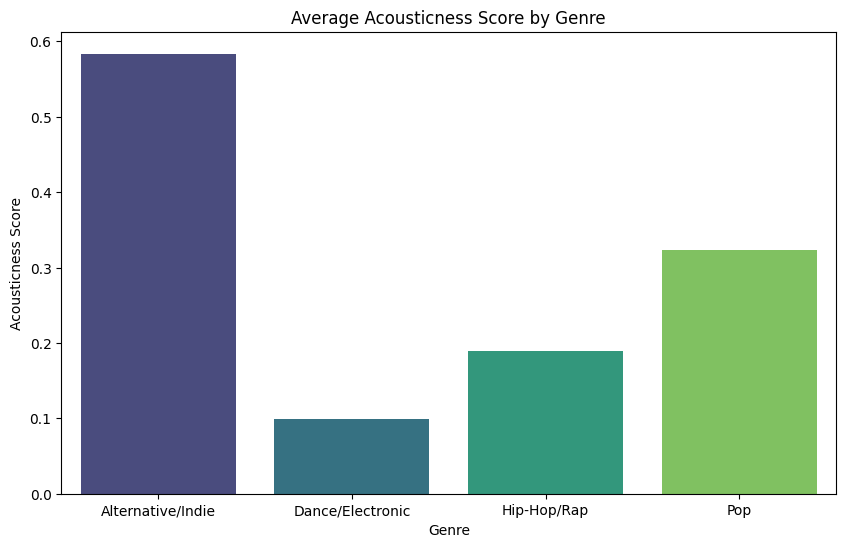

In [30]:
acousticness_by_genre = filtered_df.groupby('genre')['acousticness'].mean().reset_index()
print(acousticness_by_genre)
plt.figure(figsize=(10, 6))
sns.barplot(x='genre', y='acousticness', data=acousticness_by_genre, palette='viridis',  hue ='genre', legend=False)
plt.title('Average Acousticness Score by Genre')
plt.xlabel('Genre')
plt.ylabel('Acousticness Score')
plt.show()

## 6.Suggestions for Improvement
**Larger Dataset:**

The analysis is based on only 50 songs, which is a small sample size. A larger dataset would provide more reliable insights.

**Additional Variables:**

Including more variables like popularity, tempo, and valence could provide a more comprehensive understanding of what makes a hit song.

**Statistical Testing:**

Conducting statistical tests (e.g., t-test or Chi-Square) could help determine if the differences between genres are statistically significant.

**Temporal Analysis:**

Analyzing trends over time (e.g., comparing 2020 data with previous years) could reveal how musical preferences are evolving.